## Exploratory Data Analysis of Coursera Course Dataset

__Objective:__ Understand what factors influence student enrollment in Coursera courses.

__Key Questions:__

- Is there a relationship between course ratings and enrollment?
- What difficulty levels are most popular among students?
- Does the type of certification impact enrollment?
- Which organizations attract the most students, and why?

__Outcome:__ Provide insights into how course attributes like difficulty, certification type, and organization affect student preferences.

## About the Data

This dataset is publicly available here on [Kaggle](https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset/data) and contains 6 columns and 890 rows. The detailed description:

1. __course_title:__ Contains the course title.
2. __course_organization:__ It tells which organization is conducting the courses.
3. __course_Certificate_type:__ It has details about what are the different certifications available in courses.
4. __course_rating:__ It has the ratings associated with each course.
5. __course_difficulty:__ It tells about how difficult or what is the level of the course.
6. __course_students_enrolled:__ It has the number of students that are enrolled in the course.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("coursera_data.csv")
df = data.copy()

In [3]:
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


Column "Unnamed: 0" contains dataset identifiers which will not have any significance in this analysis. Thus, remove it.

In [4]:
df.drop(columns="Unnamed: 0", axis=1, inplace=True)

## Data Cleaning

__Handle Missing Data__

In [5]:
df.isnull().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

There is no missing data in any of the features/columns

__Handle Duplicate Data__

In [6]:
df[df['course_title'].duplicated(keep=False)]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
224,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41k
225,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54k
563,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290k
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m
582,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81k
583,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39k


Identified duplicate courses are provided either by different organizations, have different certificate types or course difficulty so, they were not removed

__Treating Outliers__

In [7]:
df.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

**_course_students_enrolled_** has a data type 'object' rather than _int_ or _float64_.  Create a new column, __students_enrolled__ with data type converted to float64.

In [ ]:
def convert_to_number(value):
    
    value = value.lower()  
    if 'k' in value:
        return float(value.replace('k', '')) * 1000
    elif 'm' in value:
        return float(value.replace('m', '')) * 1000000
    else:
        return float(value)  


df['students_enrolled'] = df['course_students_enrolled'].apply(convert_to_number)

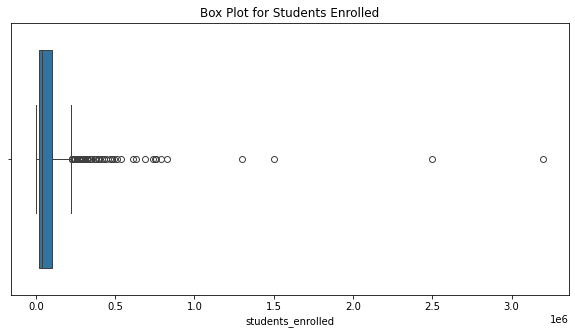

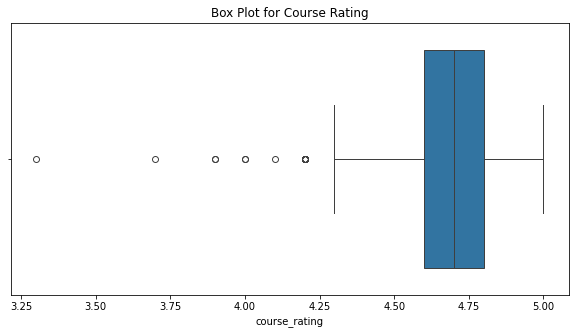

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df['students_enrolled'], orient='h')
plt.title(f"Box Plot for Students Enrolled")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df['course_rating'], orient='h')
plt.title(f"Box Plot for Course Rating")
plt.show()

Outliers are identified but will be retained in this analysis so we can accurately state the most popular course based on enrollment and identify poorly rated courses.

In [10]:
df.describe()

,course_rating,students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


## Exploratory Data Analysis

__Key Question:__ Is there a relationship between course ratings and enrollment?

> 1. What are the top courses by student enrollment?

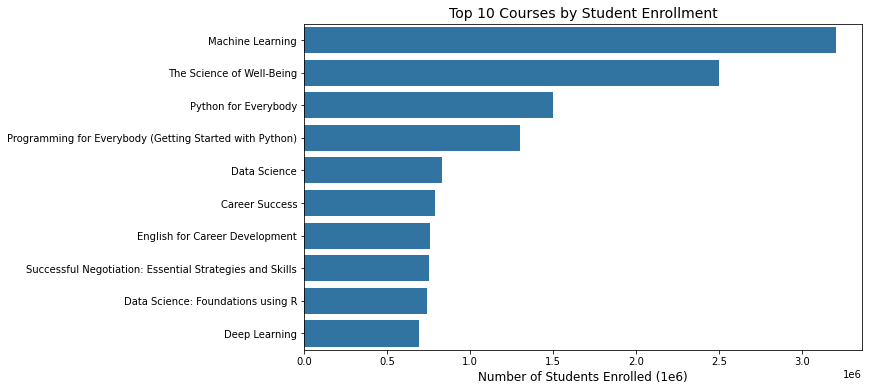

In [ ]:
top_courses_enrollment = df.sort_values(by='students_enrolled', ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_courses_enrollment['students_enrolled'], y=top_courses_enrollment['course_title'])
ax.set_ylabel(None)
plt.title("Top 10 Courses by Student Enrollment", fontsize=14)
plt.xlabel("Number of Students Enrolled (Million)", fontsize=12)
plt.show()

> 2. What are the top courses by student rating?

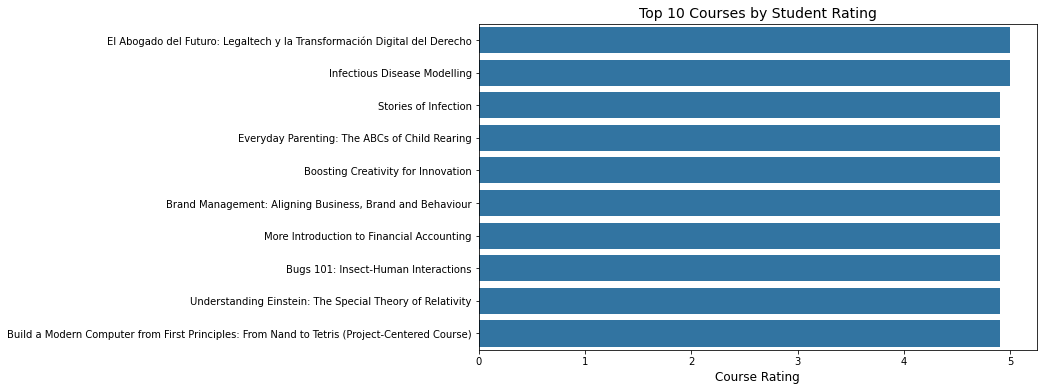

In [12]:
top_courses_rating = df.sort_values(by='course_rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_courses_rating['course_rating'], y=top_courses_rating['course_title'])
ax.set_ylabel(None)
plt.title("Top 10 Courses by Student Rating", fontsize=14)
plt.xlabel("Course Rating", fontsize=12)
plt.show()

> 3. How does student enrollment compare to top courses by enrollment and top courses by rating?

In [13]:
comparison_df = pd.DataFrame({
    "Top Courses (Enrollment)": top_courses_enrollment['course_title'].values,
    "Students Enrolled (Enrollment)": top_courses_enrollment['course_students_enrolled'].values,
    "Rating (Enrollment)": top_courses_enrollment['course_rating'].values,
    "Top Courses (Rating)": top_courses_rating['course_title'].values,
    "Students Enrolled (Rating)": top_courses_rating['course_students_enrolled'].values,
    "Rating (Rating)": top_courses_rating['course_rating'].values,
})

comparison_df


,Top Courses (Enrollment),Students Enrolled (Enrollment),Rating (Enrollment),Top Courses (Rating),Students Enrolled (Rating),Rating (Rating)
0,Machine Learning,3.2m,4.9,El Abogado del Futuro: Legaltech y la Transfor...,1.5k,5.0
1,The Science of Well-Being,2.5m,4.9,Infectious Disease Modelling,1.6k,5.0
2,Python for Everybody,1.5m,4.8,Stories of Infection,28k,4.9
3,Programming for Everybody (Getting Started wit...,1.3m,4.8,Everyday Parenting: The ABCs of Child Rearing,86k,4.9
4,Data Science,830k,4.5,Boosting Creativity for Innovation,9.5k,4.9
5,Career Success,790k,4.4,"Brand Management: Aligning Business, Brand and...",57k,4.9
6,English for Career Development,760k,4.8,More Introduction to Financial Accounting,40k,4.9
7,Successful Negotiation: Essential Strategies a...,750k,4.8,Bugs 101: Insect-Human Interactions,15k,4.9
8,Data Science: Foundations using R,740k,4.6,Understanding Einstein: The Special Theory of ...,89k,4.9
9,Deep Learning,690k,4.8,Build a Modern Computer from First Principles:...,95k,4.9


Although, top courses by enrollment and top courses by rating have similar ratings (suggesting that ratings do not have much impact), the number of students enrolled to top courses by rating is a lot lower.

> 4. What are the bottom courses by student enrollment?

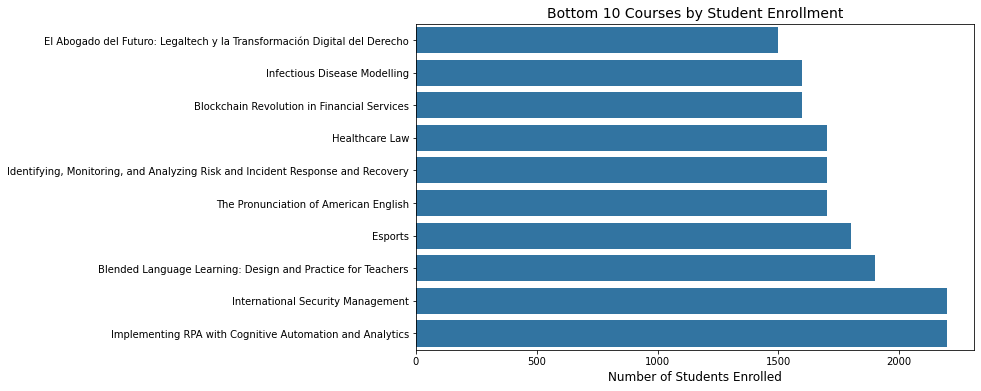

In [14]:
bottom_courses_enrollment = df.sort_values(by='students_enrolled').head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=bottom_courses_enrollment['students_enrolled'], y=bottom_courses_enrollment['course_title'])
ax.set_ylabel(None)
plt.title("Bottom 10 Courses by Student Enrollment", fontsize=14)
plt.xlabel("Number of Students Enrolled", fontsize=12)
plt.show()

> 5. What are the bottom courses by student rating?

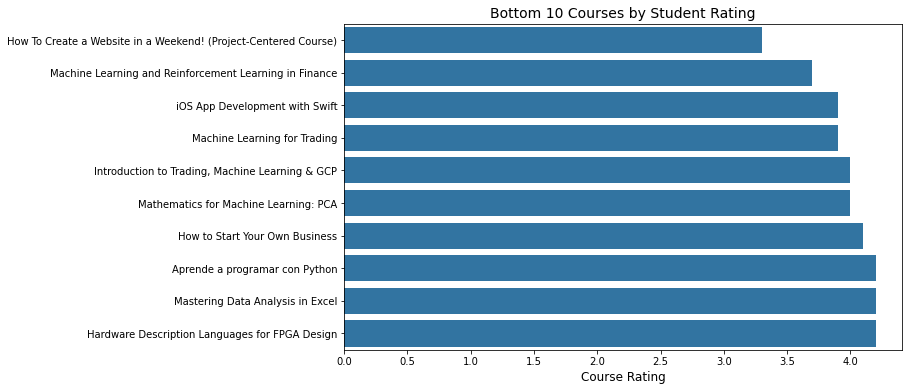

In [15]:
bottom_courses_rating = df.sort_values(by='course_rating').head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=bottom_courses_rating['course_rating'], y=bottom_courses_rating['course_title'])
ax.set_ylabel(None)
plt.title("Bottom 10 Courses by Student Rating", fontsize=14)
plt.xlabel("Course Rating", fontsize=12)
plt.show()

> 6. How does student enrollment compare to bottom courses by enrollment and bottom courses by rating?

In [16]:
bottom_comparison_df = pd.DataFrame({
    "Bottom Courses (Enrollment)": bottom_courses_enrollment['course_title'].values,
    "Students Enrolled (Enrollment)": bottom_courses_enrollment['course_students_enrolled'].values,
    "Rating (Enrollment)": bottom_courses_enrollment['course_rating'].values,
    "Bottom Courses (Rating)": bottom_courses_rating['course_title'].values,
    "Students Enrolled (Rating)": bottom_courses_rating['course_students_enrolled'].values,
    "Rating (Rating)": bottom_courses_rating['course_rating'].values,
})

bottom_comparison_df

,Bottom Courses (Enrollment),Students Enrolled (Enrollment),Rating (Enrollment),Bottom Courses (Rating),Students Enrolled (Rating),Rating (Rating)
0,El Abogado del Futuro: Legaltech y la Transfor...,1.5k,5.0,How To Create a Website in a Weekend! (Project...,140k,3.3
1,Infectious Disease Modelling,1.6k,5.0,Machine Learning and Reinforcement Learning in...,29k,3.7
2,Blockchain Revolution in Financial Services,1.6k,4.6,iOS App Development with Swift,76k,3.9
3,Healthcare Law,1.7k,4.7,Machine Learning for Trading,15k,3.9
4,"Identifying, Monitoring, and Analyzing Risk an...",1.7k,4.9,"Introduction to Trading, Machine Learning & GCP",13k,4.0
5,The Pronunciation of American English,1.7k,4.6,Mathematics for Machine Learning: PCA,33k,4.0
6,Esports,1.8k,4.5,How to Start Your Own Business,34k,4.1
7,Blended Language Learning: Design and Practice...,1.9k,4.8,Aprende a programar con Python,6.6k,4.2
8,International Security Management,2.2k,4.5,Mastering Data Analysis in Excel,280k,4.2
9,Implementing RPA with Cognitive Automation and...,2.2k,4.6,Hardware Description Languages for FPGA Design,7.4k,4.2


The courses in the bottom 10 for student enrollment, still has high ratings while the courses in the bottom 10 for student ratings has high student enrollment. This suggests that rating might not be a major contributing factor to students selection of courses.

> 7. Is there a relationship between course ratings and enrollment?

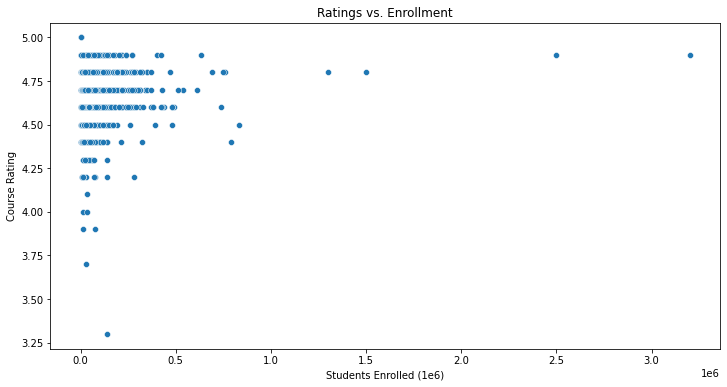

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(y=df['course_rating'], x=df['students_enrolled'])
plt.title("Ratings vs. Enrollment")
plt.ylabel("Course Rating")
plt.xlabel("Students Enrolled (Million)")
plt.show()

There is no clear trend whether course rating affects student enrollment

__Key Question:__ What difficulty levels are most popular among students?

> 8. How does student enrollment vary across course difficulty levels?

In [18]:
courses_per_difficulty = df['course_difficulty'].value_counts()

students_per_difficulty = df.groupby('course_difficulty')['students_enrolled'].sum().sort_values(ascending=False)

difficulty_df = pd.DataFrame({
    "Total Courses": courses_per_difficulty,
    "Total Students Enrolled": students_per_difficulty
}).reset_index()

difficulty_df.rename(columns={"index": "Difficulty Level"}, inplace=True)

difficulty_df.head().sort_values(by="Total Students Enrolled", ascending=False)

,Difficulty Level,Total Courses,Total Students Enrolled
1,Beginner,487,39921800.0
3,Mixed,187,24989400.0
2,Intermediate,198,14506300.0
0,Advanced,19,1264400.0


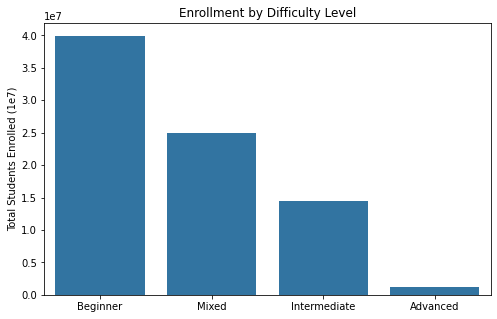

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=students_per_difficulty.index, y=students_per_difficulty.values)
ax.set_xlabel(None)
plt.title("Enrollment by Difficulty Level")
plt.ylabel("Total Students Enrolled (Million)")
plt.show()


There is a clear preference for beginner-level courses, which could be due to their large availability. Advanced-level courses on the other hand may be less appealing due to their scarcity, difficulty, or niche audience.

> 9. How does average rating vary across difficulty levels

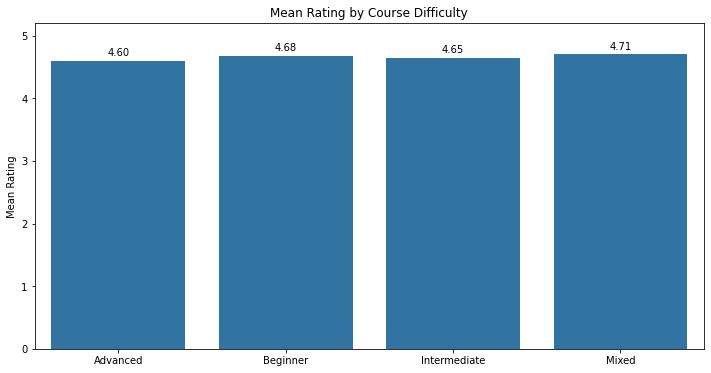

In [20]:
mean_rating = df.groupby('course_difficulty')['course_rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=mean_rating, x='course_difficulty', y='course_rating')

for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

ax.set_xlabel(None)
plt.title('Mean Rating by Course Difficulty')
plt.ylabel('Mean Rating')
plt.ylim(0, mean_rating['course_rating'].max() + 0.5)  # Add some padding for labels
plt.show()

Ratings across each difficulty level are fairly . Although the intermediate and advanced courses have ratings lower than the average rating of 4.67

__Key Question:__ - Does the type of certification impact enrollment?

> 10. What is the most popular certification type by student enrollment?

In [21]:
courses_per_certificate = df['course_Certificate_type'].value_counts()

students_per_certificate = df.groupby('course_Certificate_type')['students_enrolled'].sum().sort_values(ascending=False)

total_students = students_per_certificate.sum()

certificate_df = pd.DataFrame({
    "Total Courses": courses_per_certificate,
    "Total Students Enrolled": students_per_certificate,
    "Percentage of Students": (students_per_certificate / total_students) * 100
}).reset_index()

certificate_df.rename(columns={"index": "certificate Level"}, inplace=True)

certificate_df.head().sort_values(by="Total Students Enrolled", ascending=False)

,certificate Level,Total Courses,Total Students Enrolled,Percentage of Students
0,COURSE,582,51131300.0,63.373941
1,SPECIALIZATION,297,27262200.0,33.789735
2,PROFESSIONAL CERTIFICATE,12,2288400.0,2.836324


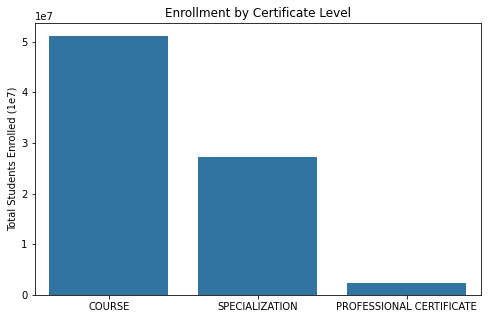

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=students_per_certificate.index, y=students_per_certificate.values)
ax.set_xlabel(None)
plt.title("Enrollment by Certificate Level")
plt.ylabel("Total Students Enrolled (Million)")
plt.show()

More than half (63.37%) of the total enrolled students encrolled for thr course certification type

> 11. How does average rating vary across each certificate type?

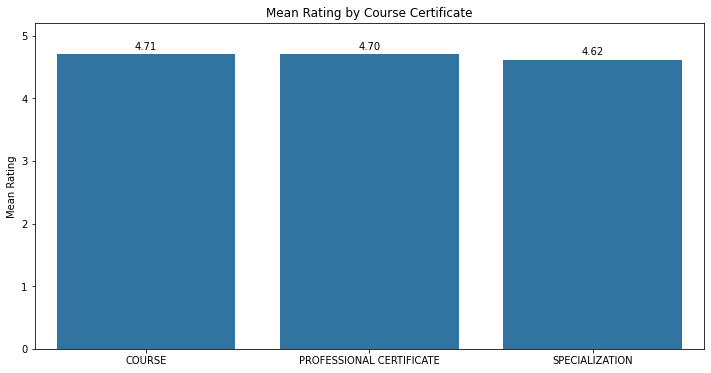

In [23]:
mean_rating_cert = df.groupby('course_Certificate_type')['course_rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=mean_rating_cert, x='course_Certificate_type', y='course_rating')

for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

ax.set_xlabel(None)
plt.title('Mean Rating by Course Certificate')
plt.ylabel('Mean Rating')
plt.ylim(0, mean_rating['course_rating'].max() + 0.5)  # Add some padding for labels
plt.show()

Course and Professional certificates have high ratings above the average compared to sepcialization which is below the average rating

__Key Question:__ Which organizations attract the most students, and why?

> 12. Which organizations attract the most students?

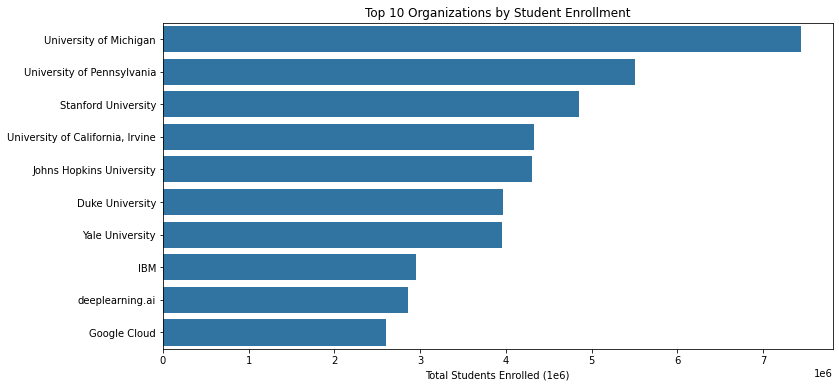

In [ ]:
org_by_enrollment = df.groupby("course_organization")["students_enrolled"].sum().reset_index()
top_organizations = org_by_enrollment.sort_values(by="students_enrolled", ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_organizations, x="students_enrolled", y="course_organization")
ax.set_ylabel(None)
plt.title("Top 10 Organizations by Student Enrollment")
plt.xlabel("Total Students Enrolled (Million)")
plt.show()

University of Michigan attracts over 7.4 million students

> 13. Are any of these top organization by enrollment also are among the top organizations by number of courses offered?

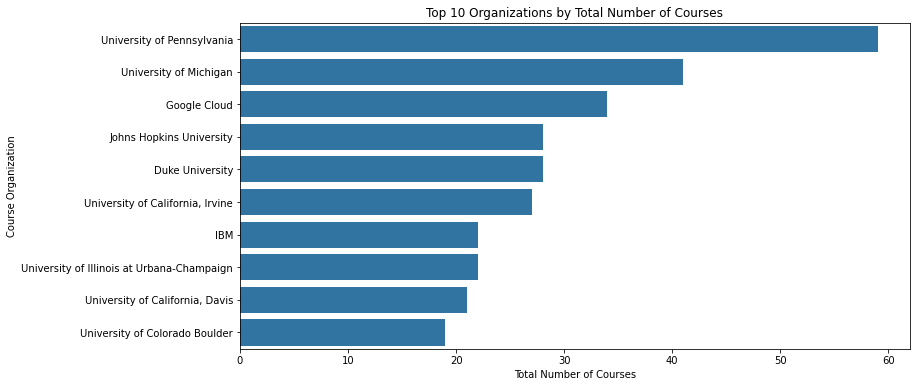

In [25]:
total_courses = df['course_organization'].value_counts().reset_index()
total_courses.columns = ['course_organization', 'total_courses']

top_course_orgs = total_courses.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_course_orgs, x='total_courses', y='course_organization')
plt.title('Top 10 Organizations by Total Number of Courses')
plt.xlabel('Total Number of Courses')
plt.ylabel('Course Organization')
plt.show()


Seven(7) of the top organizations by enrollment are also among the top organizations by courses offered. This means that there is a strong overlap between the organizations that attract the most students and those offering the highest number of courses

> 14. Are any of these organizations among the top rated organizations?

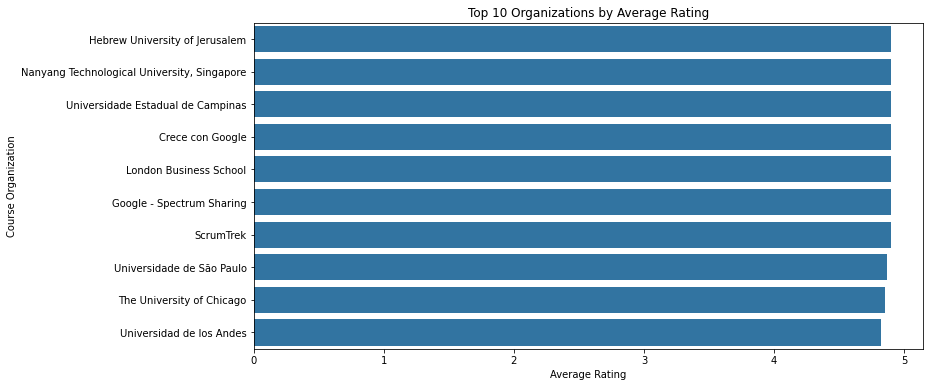

In [26]:
avg_rating_all = df.groupby('course_organization')['course_rating'].mean().reset_index()

top_rating_orgs = avg_rating_all.sort_values(by='course_rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_rating_orgs, x='course_rating', y='course_organization')
plt.title('Top 10 Organizations by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Course Organization')
plt.show()

None of the top organizations by enrolment or top organizations by courses offered were among the top rated organizations. This also suggests that there is no clear relationship between enrollment and ratings just like we saw when comparing individual courses

> 15. How does certificate type vary across the top 10 organizations by student enrollment

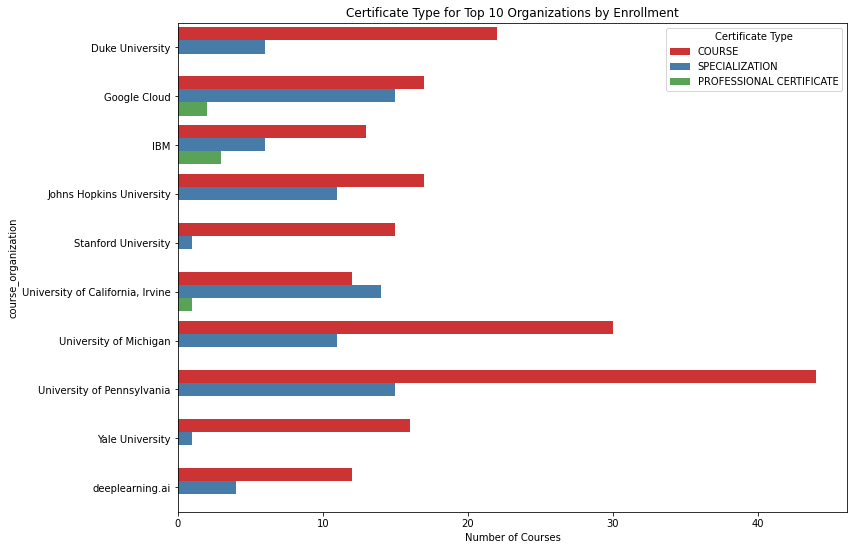

In [27]:
top_10_org = top_organizations.head(10)['course_organization']
top_org_data = df[df['course_organization'].isin(top_10_org)]

certificate_count = top_org_data.groupby(['course_organization', 'course_Certificate_type']).size().reset_index(name='count')

plt.figure(figsize=(12, 9))
sns.barplot(data=certificate_count, x='count', y='course_organization', hue='course_Certificate_type', palette='Set1')
plt.title('Certificate Type for Top 10 Organizations by Enrollment')
plt.xlabel('Number of Courses')
plt.legend(title='Certificate Type')
plt.show()

Only Google Cloud, IBM and University of California, Irvine offer professional certificate course, other organizations offer mostly course certificate types

> 16. How does course difficulty vary across the top 10 organizations by student enrollment

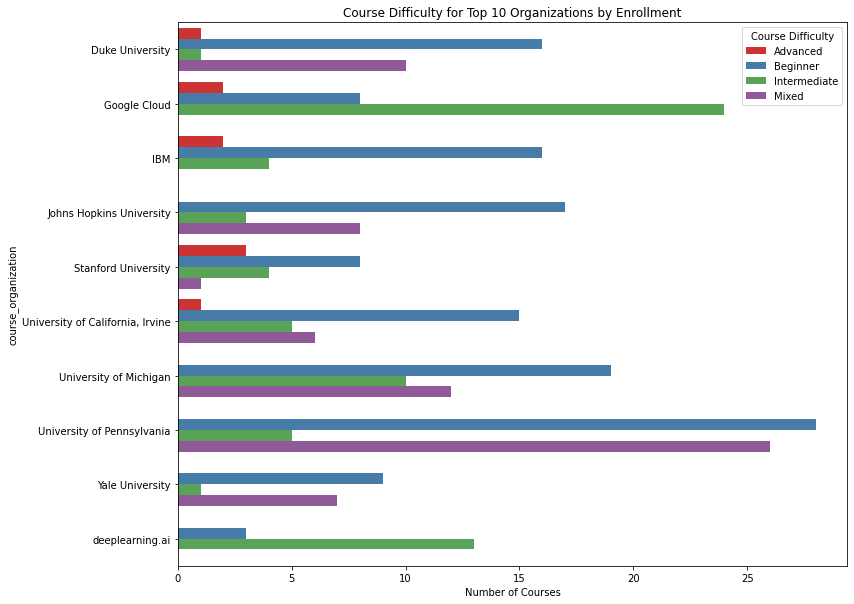

In [28]:
difficulty_count = top_org_data.groupby(['course_organization', 'course_difficulty']).size().reset_index(name='count')

plt.figure(figsize=(12, 10))
sns.barplot(data=difficulty_count, x='count', y='course_organization', hue='course_difficulty', palette='Set1')
plt.title('Course Difficulty for Top 10 Organizations by Enrollment')
plt.xlabel('Number of Courses')
plt.legend(title='Course Difficulty')
plt.show()


Among the top 10 organizations by enrollment, only Google Cloud, IBM, Stanford, Duke university and University of California, Irvine offer Advanced courses

## **Analysis: Interpretations, Insights, and Suggestions for Improvement**

---

#### **Interpretations**

1. **Enrollment vs. Ratings**  
   - Top courses by enrollment and top courses by rating show similar ratings; however, the number of students enrolled in the top-rated courses is significantly lower than those enrolled in the top-enrollment courses.  
   - Courses in the bottom 10 for student enrollment maintain high ratings, while courses in the bottom 10 for ratings often have high student enrollment.  
   - This suggests no clear relationship between course ratings and enrollment, indicating other factors such as certification type, organization, or difficulty level may play a more prominent role in attracting students.

2. **Difficulty Levels**  
   - Beginner-level courses are overwhelmingly popular, possibly due to their accessibility, broader audience appeal, or availability in greater numbers.  
   - Advanced-level courses, on the other hand, are less popular. This could stem from their niche focus, higher difficulty level, or limited availability.  
   - Ratings across difficulty levels are relatively consistent. However, intermediate and advanced courses show slightly lower average ratings (below 4.67), which could reflect greater expectations or challenges at these levels.

3. **Certification Type**  
   - "Course Certificates" dominate the offerings (65.32%), followed by "Specialization Certificates" (33.33%), and "Professional Certificates" (1.35%).  
   - Courses offering "Course Certificates" and "Professional Certificates" have higher average ratings compared to those offering "Specialization Certificates," which score below the average.  
   - Organizations providing more courses with specialization certificates, such as the University of California, Irvine, may have a unique appeal to students seeking deeper, structured learning paths.

4. **Top Organizations**  
   - The University of Michigan leads in student enrollment with over 7.4 million students, demonstrating its strong appeal.  
   - Seven out of the top organizations by student enrollment are also among the top organizations by courses offered. This overlap suggests that larger course portfolios may contribute to attracting more students.  
   - None of the top organizations by enrollment or course offerings appear among the top-rated organizations, implying that high enrollment may not correlate with the best-rated courses.  

---

#### **Insights**

1. **Student Preferences**  
   - There is a clear preference for beginner-level courses, likely driven by their ease of access and broad appeal.  
   - Certification type plays a role in student satisfaction, with "Course Certificates" and "Professional Certificates" receiving better ratings.  

2. **Course Availability and Popularity**  
   - Organizations with more extensive course offerings tend to attract more students, as seen in the overlap between top organizations by enrollment and course volume.  

3. **Top Organizations**  
   - The University of Michigan's popularity is unmatched, indicating strong branding or course relevance.  
   - Organizations like the University of California, Irvine, which offer more specialization certificates, may be catering to a different niche of learners seeking structured or advanced programs.

---

#### **Suggestions for Improvement**

1. **Investigate the Disconnect Between Ratings and Enrollment**  
   - Conduct further analysis to understand why highly rated courses may not attract as many students and why low-rated courses still maintain high enrollments.  
   - Focus on factors like pricing, branding, certification, and course topics to identify underlying causes.

2. **If more data were available, success of the courses could be further investigated by looking at the following:**  
   - Course length
   - Course completion
   - Course value - whether course is paid or free